# Univariate Profiling

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import pprint
import yaml

In [10]:
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

In [2]:
with open('../params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)

In [3]:
pprint.pprint(config["featurize"]["clean_data"])

'data/processed/clean_grouped_data.csv'


In [4]:
df = pd.read_csv('../' + config["featurize"]["clean_data"])

In [5]:
df.sample(5)

,DISCOVER_DAY,DISCOVER_HOUR,IP_ADDRESS,LATITUDE,LONGITUDE,PAIR_NAME,NAME,VEHICLES
2,21,0,192.168.250.2,23.727862,90.410508,Zero Point,To Zero Point Circle New,87
2214,15,20,192.168.250.51,23.739047,90.383322,Science Lab,To New Market New,92
2444,15,4,192.168.250.26,23.809342,90.421319,Kuril Bishawroad,To Notun Baazar New,138
1101,18,5,192.168.250.11,23.794509,90.413266,Gulshan 2,To Notun Baazar New,16
2242,15,6,192.168.250.42,23.739011,90.395889,Shahbag Circle,To Motsho Bhaban New,73


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464 entries, 0 to 2463
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DISCOVER_DAY   2464 non-null   int64  
 1   DISCOVER_HOUR  2464 non-null   int64  
 2   IP_ADDRESS     2464 non-null   object 
 3   LATITUDE       2464 non-null   float64
 4   LONGITUDE      2464 non-null   float64
 5   PAIR_NAME      2464 non-null   object 
 6   NAME           2464 non-null   object 
 7   VEHICLES       2464 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 154.1+ KB


## Summarise the Dataset

In [11]:
explore(df, method="summarize")

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
DISCOVER_DAY,int64,2464,0,0.0,7,15,16.0,18.0,20.0,21,17.921266,18.0,2.019869,0.045399
DISCOVER_HOUR,int64,2464,0,0.0,24,0,5.0,11.0,17.0,23,11.360795,11.0,6.923228,0.033401
IP_ADDRESS,object,2464,0,0.0,17,192.168.250.10,-,-,-,192.168.250.67,-,-,-,-
LATITUDE,float64,2464,0,0.0,9,23.709414,23.73757,23.782804,23.794509,23.809342,23.765014,23.782804,0.032878,-0.15491
LONGITUDE,float64,2464,0,0.0,9,90.347026,90.395889,90.401916,90.413266,90.421319,90.398565,90.401916,0.022342,-1.477529
NAME,object,2464,0,0.0,15,To Aminbazar New,-,-,-,To Zero Point Circle New,-,-,-,-
PAIR_NAME,object,2464,0,0.0,9,Buriganga Bridge,-,-,-,Zero Point,-,-,-,-
VEHICLES,int64,2464,0,0.0,879,1,75.75,209.0,461.0,1948,347.256899,209.0,371.779706,1.449997


## Profile the Dataset

In [12]:
explore(df, method="profile", report_name="EVI Dataset Report", is_large_dataset=False)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Numerical Variable Profiling

### DISCOVER_DAY

In [22]:
explore(df, method="summarize").loc["DISCOVER_DAY"]

dtypes          int64
count            2464
null_sum            0
null_pct          0.0
nunique             7
min                15
25%              16.0
50%              18.0
75%              20.0
max                21
mean        17.921266
median           18.0
std          2.019869
skew         0.045399
Name: DISCOVER_DAY, dtype: object

- The **mean** of the data is 17.92, while the **median** is 18. This indicates that the data is approximately symmetric, with no significant outliers that would pull the mean away from the median. 
- The **standard deviation** of the data is 2.02, indicating that the data has a relatively small spread around the mean
- The **skewness** of the data is 0.045, which is close to zero. This indicates that the data is approximately symmetric, with a slight tendency towards positive skewness.

In [23]:
# calculate the skewness and kurtosis of a numeric column
print(df['DISCOVER_DAY'].skew())
print(df['DISCOVER_DAY'].kurtosis())

0.045399194778665074
-1.2696724052189228


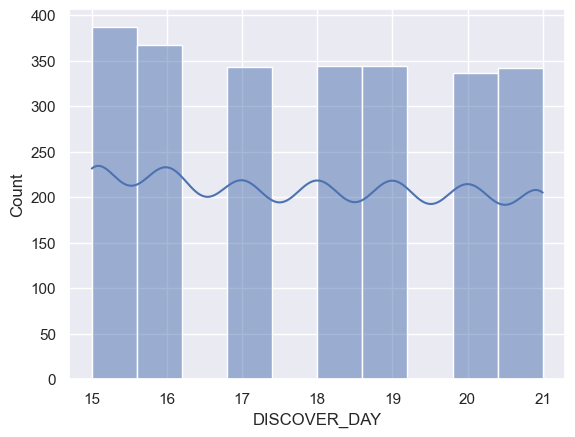

In [40]:
sns.histplot(df['DISCOVER_DAY'], bins=10, kde=True);
plt.show()

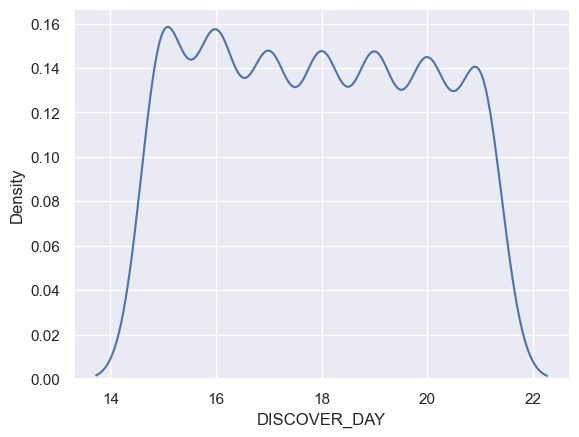

In [38]:
sns.kdeplot(df['DISCOVER_DAY']);
plt.show()

2023-03-06 14:19:33,324 [7624] WARNING  py.warnings:109: [JupyterRequire] Z:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.




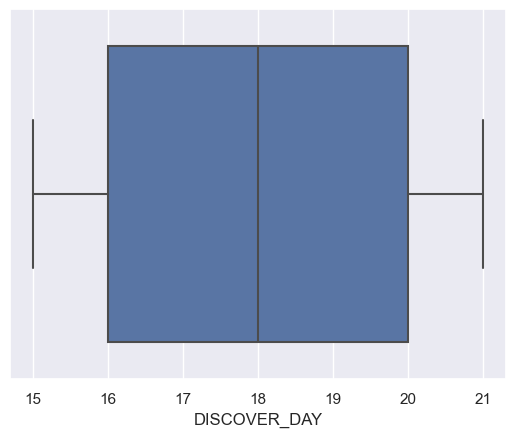

In [39]:
sns.boxplot(df['DISCOVER_DAY']);
plt.show()

In [27]:
df['DISCOVER_DAY'].value_counts()

15    387
16    367
18    344
19    344
17    343
21    342
20    337
Name: DISCOVER_DAY, dtype: int64

### DISCOVER_HOUR

In [31]:
# calculate summary statistics for a numeric column
explore(df, method="summarize").loc["DISCOVER_HOUR"]

dtypes          int64
count            2464
null_sum            0
null_pct          0.0
nunique            24
min                 0
25%               5.0
50%              11.0
75%              17.0
max                23
mean        11.360795
median           11.0
std          6.923228
skew         0.033401
Name: DISCOVER_HOUR, dtype: object

**Mean and Median:** The mean of the data is 11.36, while the median is 11. This indicates that the data is approximately symmetric, with no significant outliers that would pull the mean away from the median.

**Standard Deviation:** The standard deviation of the data is 6.92, indicating that the data has a relatively large spread around the mean.

**Skewness:** The skewness of the data is 0.033, which is close to zero. This indicates that the data is approximately symmetric, with a slight tendency towards positive skewness.

Based on these observations, we can conclude that the data is relatively normal and symmetric, with a relatively large spread around the mean.

**Rescale the data:** Min-max scaling can be applied

**Consider transformations:** Need to explore with Logarithmic Transformation, Square Root Transformation, Box-Cox Transformation

**Use appropriate statistical tests:** Need to apply Nonparametric tests like Mann-Whitney U Test, Wilcoxon Signed-Rank Test, Kruskal-Wallis Test

In [32]:
# calculate the skewness and kurtosis of a numeric column
print(df['DISCOVER_HOUR'].skew())
print(df['DISCOVER_HOUR'].kurtosis())

0.033400918603941315
-1.2017914100862988


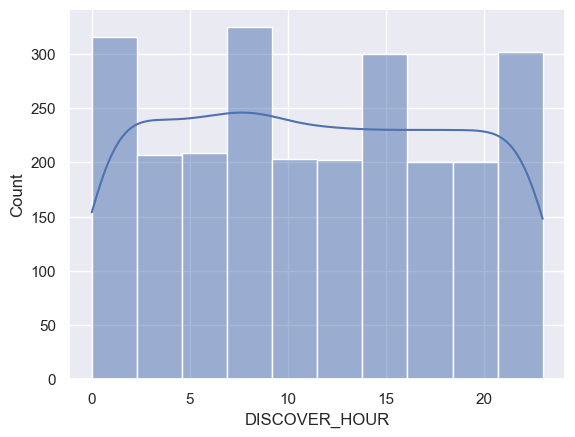

In [41]:
sns.histplot(df['DISCOVER_HOUR'], bins=10, kde=True);
plt.show()

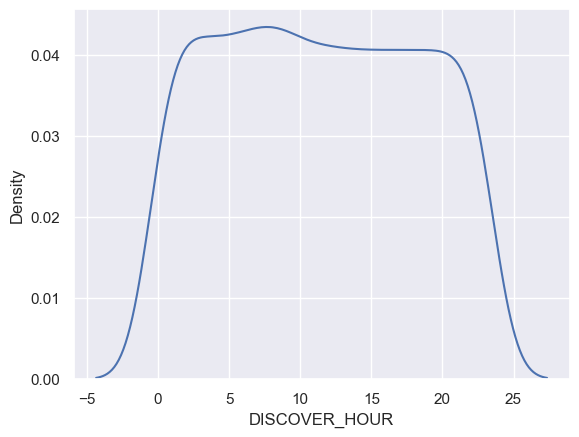

In [42]:
sns.kdeplot(df['DISCOVER_HOUR']);
plt.show()

2023-03-06 14:20:42,507 [7624] WARNING  py.warnings:109: [JupyterRequire] Z:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.




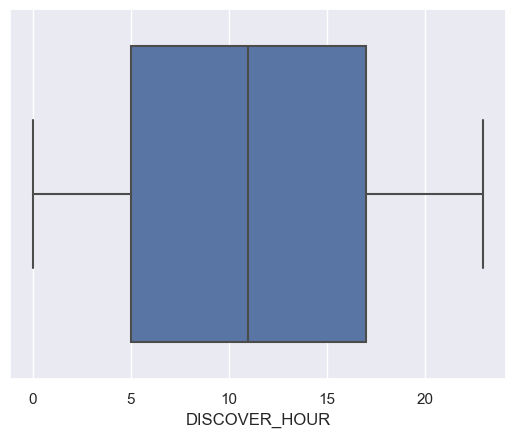

In [43]:
sns.boxplot(df['DISCOVER_HOUR']);
plt.show()

In [44]:
df['DISCOVER_HOUR'].value_counts()

8     109
9     108
7     108
1     106
2     106
6     105
5     104
3     104
0     104
4     103
12    102
10    102
23    102
11    101
20    100
19    100
18    100
17    100
21    100
16    100
15    100
14    100
13    100
22    100
Name: DISCOVER_HOUR, dtype: int64

### VEHICLES

In [45]:
# calculate summary statistics for a numeric column
explore(df, method="summarize").loc["VEHICLES"]

dtypes           int64
count             2464
null_sum             0
null_pct           0.0
nunique            879
min                  1
25%              75.75
50%              209.0
75%              461.0
max               1948
mean        347.256899
median           209.0
std         371.779706
skew          1.449997
Name: VEHICLES, dtype: object

**The mean (347.256899)** is larger than the **median (209.0)**, indicating that the distribution is right-skewed.

**The standard deviation (371.779706)** is quite large, indicating that the data is spread out over a wide range.

**The skewness coefficient (1.449997)** is positive, confirming that the distribution is highly skewed to the right.

**Consider transformations:** Consider transforming the data (e.g., using a **logarithmic or power transformation**) to reduce the skewness before performing statistical tests or making inferences.

**Rescale the data:** Using **standardization** (subtracting the mean and dividing by the standard deviation) or **normalization** (scaling the data to a fixed range, such as 0 to 1).

**Use appropriate statistical tests:** Non-parametric tests, robust regression methods, and bootstrapping techniques are often used for analyzing such data.

In [47]:
# calculate the skewness and kurtosis of a numeric column
print(df['VEHICLES'].skew())
print(df['VEHICLES'].kurtosis())

1.4499965581302956
1.3885630571039815


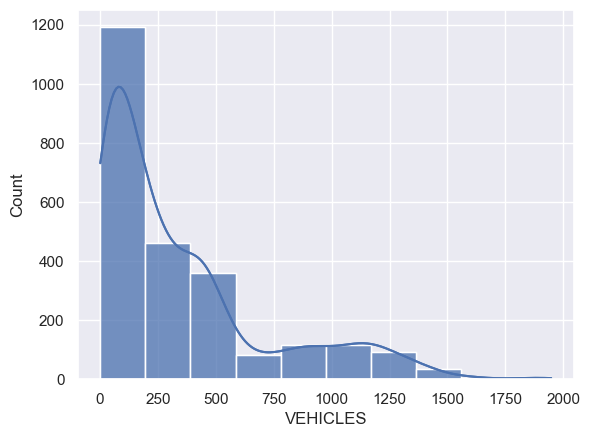

In [49]:
sns.histplot(df['VEHICLES'], bins=10, kde=True);
plt.show()

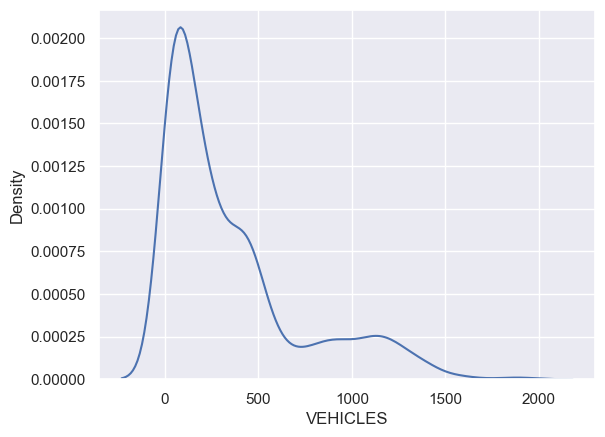

In [50]:
sns.kdeplot(df['VEHICLES']);
plt.show()

2023-03-06 15:23:36,617 [7624] WARNING  py.warnings:109: [JupyterRequire] Z:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.




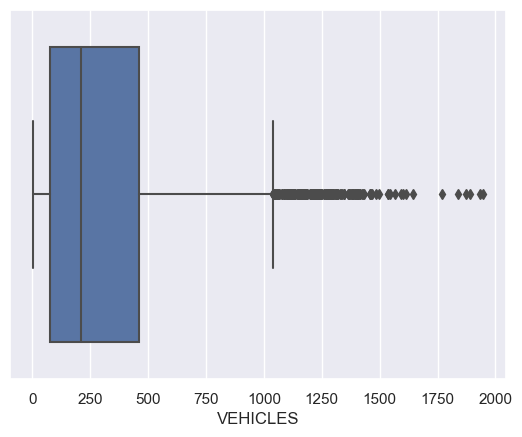

In [51]:
sns.boxplot(df['VEHICLES']);
plt.show()

In [ ]:
df['VEHICLES'].value_counts()

#### Robust scaling and/or Power transformations, also known as Box-Cox transformations can be applied

### LATITUDE

In [46]:
# calculate summary statistics for a numeric column
explore(df, method="summarize").loc["LATITUDE"]

dtypes        float64
count            2464
null_sum            0
null_pct          0.0
nunique             9
min         23.709414
25%          23.73757
50%         23.782804
75%         23.794509
max         23.809342
mean        23.765014
median      23.782804
std          0.032878
skew         -0.15491
Name: LATITUDE, dtype: object

- The **mean and median** are very close to each other, indicating that the dataset is approximately symmetric.
- The **standard deviation** is small, indicating that the data points are closely clustered around the mean.
- **The negative skewness value** indicates that the dataset is slightly skewed to the left. This means that the tail of the dataset is longer on the left side, and the majority of the data is concentrated on the right side.

In [52]:
# calculate the skewness and kurtosis of a numeric column
print(df['LATITUDE'].skew())
print(df['LATITUDE'].kurtosis())

-0.1549100826797467
-1.5288722150210357


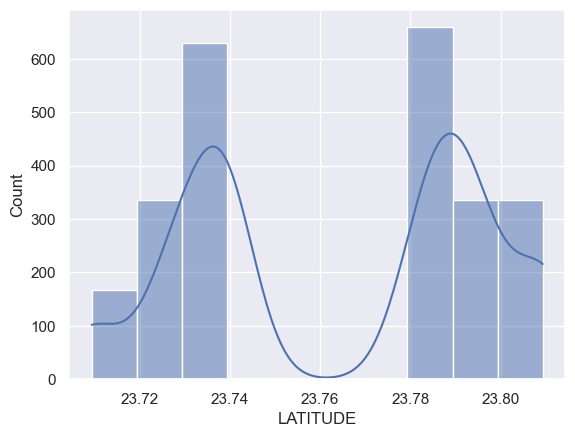

In [53]:
sns.histplot(df['LATITUDE'], bins=10, kde=True);
plt.show()

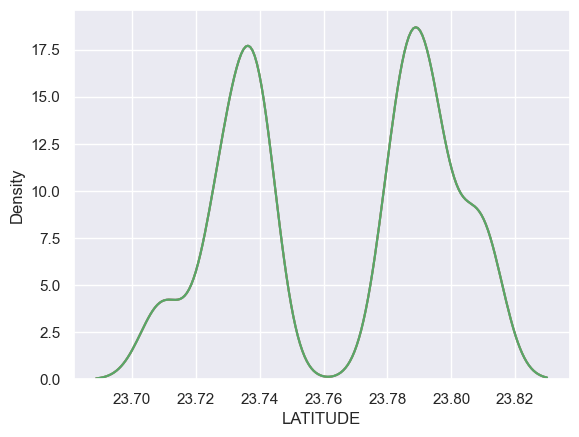

In [56]:
sns.kdeplot(df['LATITUDE']);
plt.show()

2023-03-06 15:24:18,174 [7624] WARNING  py.warnings:109: [JupyterRequire] Z:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.




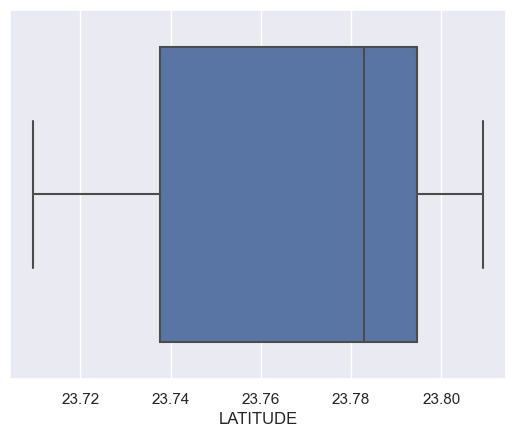

In [57]:
sns.boxplot(df['LATITUDE']);
plt.show()

In [58]:
df['LATITUDE'].value_counts()

23.809342    336
23.727862    336
23.782804    336
23.739011    336
23.794509    336
23.788739    323
23.737570    207
23.709414    167
23.739047     87
Name: LATITUDE, dtype: int64

#### Min-max scaling can be applied

### LONGITUDE

In [59]:
# calculate summary statistics for a numeric column
explore(df, method="summarize").loc["LONGITUDE"]

dtypes        float64
count            2464
null_sum            0
null_pct          0.0
nunique             9
min         90.347026
25%         90.395889
50%         90.401916
75%         90.413266
max         90.421319
mean        90.398565
median      90.401916
std          0.022342
skew        -1.477529
Name: LONGITUDE, dtype: object

- The mean and median are close to each other, indicating that the dataset is **approximately symmetric**.
- The small standard deviation indicates that the data points are **tightly clustered around the mean**.
- The negative skewness value indicates that the dataset is **significantly skewed to the left**. This means that the tail of the dataset is longer on the left side, and there are a few extreme lower values.

**Rescale the data:** Robust scaling and/or Power transformations, also known as Box-Cox transformations  can be applied

**Consider transformations:** Explore with taking the logarithm of the values, or power transformation or a Box-Cox transformation.

**Use appropriate statistical measures:** When describing a left-skewed distribution, it may be more appropriate to report the median rather than the mean, as the mean can be skewed by the extreme values on the left-hand side. Similarly, using quartiles (such as the first and third quartiles) may be more informative than using the standard deviation.

**Use appropriate statistical tests:** non-parametric methods such as the Wilcoxon signed-rank test or the Kruskal-Wallis test may be more appropriate.

In [60]:
# calculate the skewness and kurtosis of a numeric column
print(df['LONGITUDE'].skew())
print(df['LONGITUDE'].kurtosis())

-1.4775292505081994
1.0629070745235687


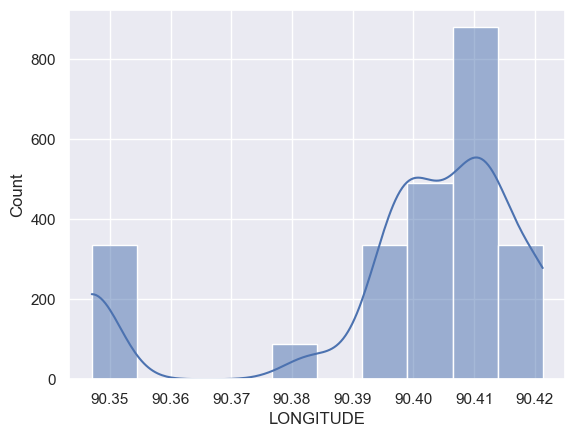

In [61]:
sns.histplot(df['LONGITUDE'], bins=10, kde=True);
plt.show()

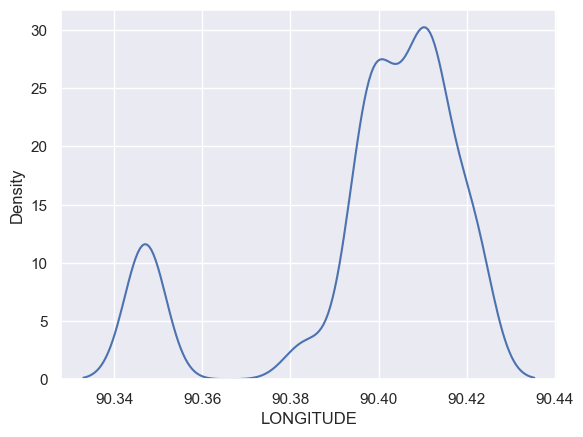

In [62]:
sns.kdeplot(df['LONGITUDE']);
plt.show()

2023-03-06 15:34:47,694 [7624] WARNING  py.warnings:109: [JupyterRequire] Z:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.




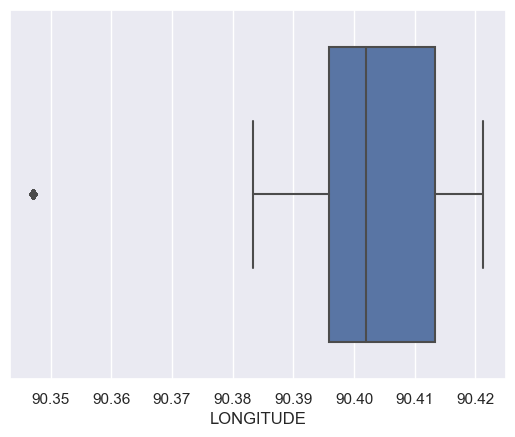

In [63]:
sns.boxplot(df['LONGITUDE']);
plt.show()

In [64]:
df['LONGITUDE'].value_counts()

90.421319    336
90.410508    336
90.347026    336
90.395889    336
90.413266    336
90.400117    323
90.407661    207
90.401916    167
90.383322     87
Name: LONGITUDE, dtype: int64

## Categorical Variable Profiling

### IP_ADDRESS

In [65]:
explore(df, method="summarize").loc["IP_ADDRESS"]

dtypes              object
count                 2464
null_sum                 0
null_pct               0.0
nunique                 17
min         192.168.250.10
25%                      -
50%                      -
75%                      -
max         192.168.250.67
mean                     -
median                   -
std                      -
skew                     -
Name: IP_ADDRESS, dtype: object

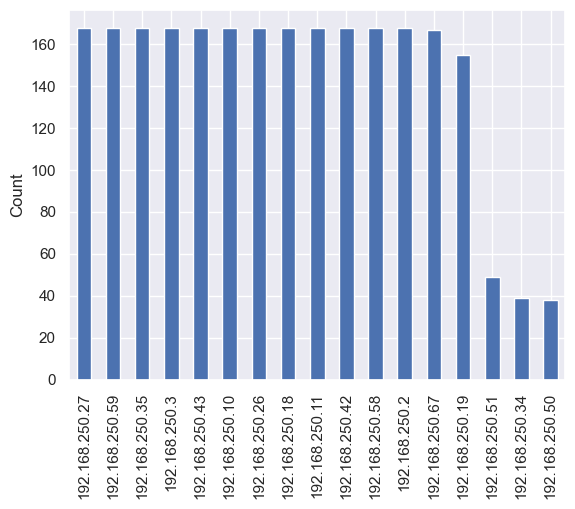

In [66]:
# visualize the distribution of a categorical column
df['IP_ADDRESS'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

#### encoding can be applied using one-hot encoding

### PAIR_NAME

In [67]:
explore(df, method="summarize").loc["PAIR_NAME"]

dtypes                object
count                   2464
null_sum                   0
null_pct                 0.0
nunique                    9
min         Buriganga Bridge
25%                        -
50%                        -
75%                        -
max               Zero Point
mean                       -
median                     -
std                        -
skew                       -
Name: PAIR_NAME, dtype: object

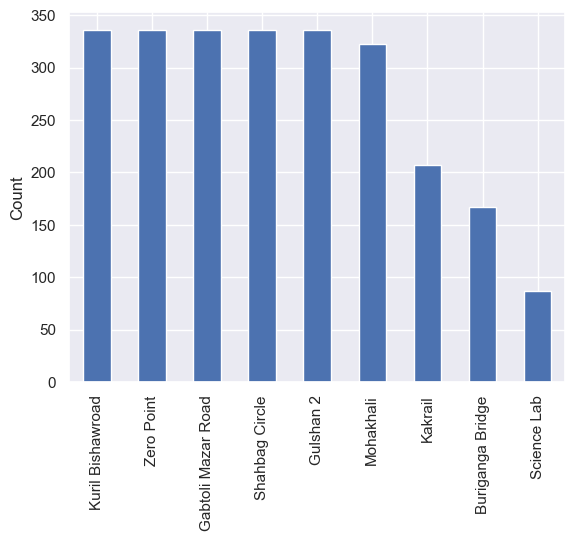

In [68]:
# visualize the distribution of a categorical column
df['PAIR_NAME'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

#### encoding can be applied using one-hot encoding

### NAME

In [69]:
explore(df, method="summarize").loc["NAME"]

dtypes                        object
count                           2464
null_sum                           0
null_pct                         0.0
nunique                           15
min                 To Aminbazar New
25%                                -
50%                                -
75%                                -
max         To Zero Point Circle New
mean                               -
median                             -
std                                -
skew                               -
Name: NAME, dtype: object

In [ ]:
# visualize the distribution of a categorical column
df['NAME'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

#### encoding can be applied using one-hot encoding

## 